In [8]:
!pip install kaggle


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\capnf\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
#importing resources
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LinearRegression  # Using Linear Regression
from sklearn.metrics import mean_squared_error, r2_score
#import kaggle

#kaggle datasets download rabieelkharoua/predicting-hiring-decisions-in-recruitment-data
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('recruitment_data.csv')  # Update the path as needed
df = df[df['ExperienceYears'] <= (df['Age'] - 18)]  # Filter invalid rows based on age and experience
df['EducationLevel'] = df['EducationLevel'].replace({1: 1, 2: 1})  # Merge Bachelor's (Type 1 and Type 2)



# Display the first 5 rows of the DataFrame
print(df.head())


   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               1                0                  3   
1   39       1               4               12                  3   
2   48       0               1                3                  2   
3   34       1               1                5                  2   
4   30       0               1                6                  1   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            26.783828              48          78                91   
1            25.862694              35          68                80   
2             9.920805              20          67                13   
3             6.407751              36          27                70   
4            43.105343              23          52                85   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1                    2               1  
2                    2 

In [ ]:
df['InterviewScoreCategory'] = pd.cut(df['InterviewScore'], bins=[-1, 20, 40, 60, 80, 100], labels=[1, 2, 3, 4, 5])
df['SkillScoreCategory'] = pd.cut(df['SkillScore'], bins=[-1, 20, 40, 60, 80, 100], labels=[1, 2, 3, 4, 5])
df['PersonalityScoreCategory'] = pd.cut(df['PersonalityScore'], bins=[-1, 20, 40, 60, 80, 100], labels=[1, 2, 3, 4, 5])

df.drop(columns=['InterviewScore', 'SkillScore', 'PersonalityScore'], inplace=True)

In [11]:
df.drop(columns=['RecruitmentStrategy'], inplace=True)

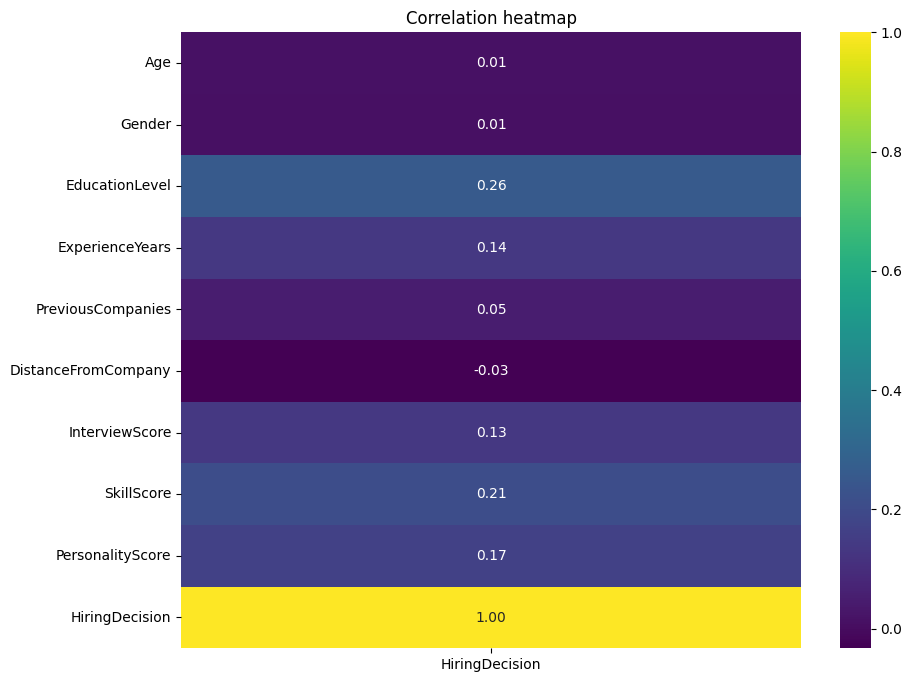

In [12]:
numeric_data = df.select_dtypes(include=['int64', 'float64', 'object', 'category'])
correlation = numeric_data.corr()['HiringDecision'].to_frame()
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation, annot=True, cmap='viridis', fmt=".2f")  
plt.title('Correlation heatmap')
plt.show()

In [13]:
le = LabelEncoder()
df['HiringDecision'] = le.fit_transform(df['HiringDecision'])

# Step 4: Split the data into features and target
X = df.drop('HiringDecision', axis=1)  # Features (all columns except the target)
y = df['HiringDecision']  # Target variable

# Step 5: Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create a simple classification model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       171
           1       0.66      0.44      0.53        71

    accuracy                           0.77       242
   macro avg       0.73      0.67      0.69       242
weighted avg       0.76      0.77      0.75       242

Confusion Matrix:
[[155  16]
 [ 40  31]]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=200),
    "Support Vector Machine": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42)
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    #"LightGBM": LGBMClassifier(random_state=42),
    #"CatBoost": CatBoostClassifier(verbose=0, random_state=42),
}

# Step 3: Loop through models and evaluate
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Print results
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("=" * 50)  # Separator for better readability

Model: Logistic Regression
Accuracy: 0.72
Confusion Matrix:
[[147  24]
 [ 43  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       171
           1       0.54      0.39      0.46        71

    accuracy                           0.72       242
   macro avg       0.66      0.63      0.63       242
weighted avg       0.70      0.72      0.71       242

Model: Support Vector Machine
Accuracy: 0.71
Confusion Matrix:
[[162   9]
 [ 61  10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.95      0.82       171
           1       0.53      0.14      0.22        71

    accuracy                           0.71       242
   macro avg       0.63      0.54      0.52       242
weighted avg       0.67      0.71      0.65       242

Model: Random Forest
Accuracy: 0.77
Confusion Matrix:
[[155  16]
 [ 40  31]]
Classification Report:
              precision    reca

C:\Users\capnf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [16]:

# Function to make predictions based on new input
def predict_hiring_decision(new_data):
    # Ensure the new_data is in the same format as the training data
    new_df = pd.DataFrame([new_data])

    # Debugging: Print expected columns
    expected_columns = X.columns.tolist()
    print(f'Expected columns: {expected_columns}')
    print(f'Input columns: {new_df.columns.tolist()}')

    # Check if new data contains all required columns
    if not all(column in new_df.columns for column in expected_columns):
        raise ValueError(f'Missing columns in input data. Expected: {expected_columns}, Got: {new_df.columns.tolist()}')

    # Loop through each model to make predictions
    predictions = {}
    for model_name, model in models.items():
        # Make prediction
        prediction = model.predict(new_df)

        # Store the predicted label (reversing the label encoding for display)
        predictions[model_name] = le.inverse_transform(prediction)[0]  # Return the predicted label

    return predictions

# Example of how to use the predict function with all models
new_candidate = {
    'Age': 30,  # Example age
    'Gender': 0,  # Male
    'EducationLevel': 1,  # Bachelor's (Type 1)
    'ExperienceYears': 5,
    'PreviousCompanies': 2,
    'DistanceFromCompany': 10.0,
    'InterviewScore': 80,
    'SkillScore': 70,
    'PersonalityScore': 85,
    #'RecruitmentStrategy': 1,  # Aggressive
}

# Get predictions from all models for the new candidate
predicted_decisions = predict_hiring_decision(new_candidate)

# Print out the predictions for each model
for model_name, decision in predicted_decisions.items():
    print(f'The predicted hiring decision for the new candidate using {model_name} is: {decision}')


Expected columns: ['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']
Input columns: ['Age', 'Gender', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']
The predicted hiring decision for the new candidate using Logistic Regression is: 0
The predicted hiring decision for the new candidate using Support Vector Machine is: 1
The predicted hiring decision for the new candidate using Random Forest is: 1
The predicted hiring decision for the new candidate using Gradient Boosting is: 1
The predicted hiring decision for the new candidate using K-Nearest Neighbors is: 0
The predicted hiring decision for the new candidate using Decision Tree is: 0
The predicted hiring decision for the new candidate using AdaBoost is: 1


How to make it regression?

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # or use LogisticRegression
import pandas as pd
import pickle

df = pd.read_csv('recruitment_data.csv')  # Update the path as needed
df = df[df['ExperienceYears'] <= (df['Age'] - 18)]  # Filter invalid rows based on age and experience
#df['EducationLevel'] = df['EducationLevel'].replace({1: 1, 2: 1})  # Merge Bachelor's (Type 1 and Type 2)

df.drop(columns=['RecruitmentStrategy'], inplace=True)

# Assume 'df' is your DataFrame and 'hired' is the column with 0/1 indicating hiring status
X = df.drop(columns=['HiringDecision'], axis=1)  # Input columns
y = df['HiringDecision']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()  # or LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for the test set
probabilities = model.predict_proba(X_test)[:, 1]  # Probability of being hired (1)

# Convert to percentages
percentages = probabilities * 100

print("Predicted hiring probabilities:", percentages)


from sklearn.metrics import accuracy_score

# Define threshold
threshold = 0.6  # 70%

# Generate binary predictions based on the threshold
binary_predictions = (probabilities >= threshold).astype(int)  # Convert probabilities to 0 or 1 based on 70%

# Calculate accuracy by comparing binary predictions to actual hiring data
accuracy = accuracy_score(y_test, binary_predictions)

print(f"Accuracy based on 70% threshold: {accuracy * 100:.2f}%")

with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)



Predicted hiring probabilities: [ 5. 49. 24. 35. 89.  3.  4.  8. 21. 36.  1. 40. 18.  4. 20. 24. 38.  8.
 39.  4. 28. 27. 26. 69. 32. 34. 44. 34. 41. 25. 18. 20. 45. 28. 31. 35.
 61.  8. 21. 36. 63. 40. 47. 14. 50. 53. 27. 34. 57. 18. 20. 45. 36. 37.
 48. 29. 53.  3. 86.  9. 26. 10. 50. 26. 23. 36. 21. 19. 31. 23. 15. 25.
 25. 23. 52. 28. 19. 14. 44. 17. 65. 28. 58. 12.  8. 42. 38. 80. 33. 31.
 12. 10.  7. 21. 20. 53. 35.  5. 15. 24. 27. 59. 10. 26. 46. 75. 47. 10.
 52. 93. 38. 29. 15. 55. 20. 75.  2. 47. 26. 43. 14. 32. 24. 25. 51. 13.
 17.  9. 11. 14. 30. 55. 50.  8. 49. 34. 45. 25. 37. 46. 41. 62. 47.  7.
 88. 54. 57. 50. 16. 59. 70. 69.  9.  7. 44. 88. 21.  6. 40. 40. 47.  2.
 11. 24. 37. 23. 29. 35. 39. 47. 22. 47. 42. 50. 31. 13. 46. 59. 68. 63.
 24. 11. 33. 62. 26. 13. 22. 17. 19. 29. 34. 12.  7. 76. 39. 39. 40. 48.
 93. 53.  4. 54. 35. 55. 50. 61. 45. 20. 14.  9. 24. 22. 14. 55. 29.  7.
 32. 13. 13. 20. 24. 72.  3. 63. 14. 44.  8. 29. 22. 32. 31. 48. 78. 18.
 19. 19. 18. 72. 56

In [ ]:
new_candidate = {
    'Age': 30,               # Example age
    'Gender': 0,             # Male
    'EducationLevel': 0,     # Bachelor's (Type 1)
    'ExperienceYears': 5,
    'PreviousCompanies': 2,
    'DistanceFromCompany': 10.0,
    'InterviewScore': 80,
    'SkillScore': 70,
    'PersonalityScore': 85,
    'RecruitmentStrategy': 1,  # Aggressive (include if necessary)
}

# Convert to a DataFrame, ensuring the column order matches the training data
new_candidate_df = pd.DataFrame([new_candidate])

# Predict the probability of being hired for this candidate
hiring_probability = model.predict_proba(new_candidate_df)[:, 1][0]  # Probability of "hired" (1)

# Convert to percentage
hiring_percentage = hiring_probability * 100

is_confident_prediction = hiring_probability >= threshold

# Display prediction and confidence level
print(f"Predicted hiring probability: {hiring_percentage:.2f}%")
if is_confident_prediction:
    print("The model confidently predicts the candidate will be hired (above 70%).")
else:
    print("The model does not confidently predict hiring (below 70%).")
    

Predicted hiring probability: 78.00%
The model confidently predicts the candidate will be hired (above 70%).


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Load CSV Dataset
data = pd.read_csv('recruitment_data.csv')

data = data[data['ExperienceYears'] <= (data['Age'] - 15)]  # Filter invalid rows based on age and experience

data['EducationLevel'] = data['EducationLevel'].replace({1: 1, 2: 1})  # Merge Bachelor's (Type 1 and Type 2)
#data.drop(columns=['RecruitmentStrategy'], inplace=True)

# Separate Features and Target
X = data.drop('HiringDecision', axis=1)  # Drop target column
y = data['HiringDecision']               # Target column

# Split Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Neural Network
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer
    Dense(32, activation='relu'),                             # Hidden layer
    Dense(1, activation='sigmoid')                            # Output layer for binary classification
])

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predict Probabilities
probabilities = model.predict(X_test)
print("Sample Predictions (Probabilities of Success):", probabilities[:5].flatten())


from sklearn.metrics import accuracy_score

# Predict probabilities on the test set
probabilities = model.predict(X_test)

# Convert probabilities to binary predictions using a threshold (default: 0.5)
predictions = (probabilities >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

C:\Users\capnf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.2932, Test Accuracy: 0.8977
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Sample Predictions (Probabilities of Success): [0.17848676 0.06343444 0.79054916 0.74757135 0.45648625]
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 89.77%


In [21]:
import pandas as pd

data = pd.read_csv('recruitment_data.csv')

filtered_data = data[data['HiringDecision'] == 0]

top_5_candidates = filtered_data.sort_values(by=['SkillScore', 'PersonalityScore', 'InterviewScore', 'ExperienceYears', 'EducationLevel'], ascending=False).head(5)

print(top_5_candidates)

      Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
46     49       0               3                2                  1   
1024   40       0               2               12                  4   
633    41       0               2                9                  2   
966    39       0               2               13                  5   
526    23       1               1                1                  3   

      DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
46               7.070745              67         100                99   
1024            34.463290              43         100                93   
633             32.594008              39         100                91   
966              6.788002              18         100                88   
526              2.937847               1         100                80   

      RecruitmentStrategy  HiringDecision  
46                      3               0  
1024                  